In [7]:
import matplotlib.pylab as plt   # That gives plotting, and the next line makes plots appear inline in notebook
%matplotlib inline 
plt.rcParams['figure.dpi']= 300

import numpy as np  # That gives numerical arrays and tools for manipulating them

### Initializing a random number generator

First we need to initialize a random number GENERATOR (rng).  We do this by calling `default_rng` from the submodule (I think of this as a sub-package, or subfolder of functions) `random` within numpy.  

* Note that we pass no argument.  This will draw a "high entropy" (unpredictable) seed from the operating system.

* See our python tutorial for abit more on seeds for random number generators -- think of these as their starting point for generating a rondom sequence.  Most of the time we wnat these starting points to be different every time we run the code, which is assured by the below.

In [8]:
rng = np.random.default_rng()

#### Testing out the generator

Now we're ready to go!  Let's generate an 1-D array of uniformly distributed random variables in the range [0,1), of length 10.  We use syntax `rng.uniform(left_limit,right_limit,length)`

In [9]:
r = rng.uniform(0,1,10)
print(r)

[0.57184008 0.57328228 0.20798543 0.84909361 0.22583359 0.36203197
 0.48095229 0.26445456 0.14822214 0.80381594]


Similar syntax for a 2-D array, or a higher-dimensional array as well!  We swap out the length with the size of the array, in round brackets (formally that is called a tuple in python).

In [10]:
a = rng.uniform(0,1,(3,3))
print(a)

[[0.0759906  0.86803389 0.79638669]
 [0.55789399 0.4018785  0.45546958]
 [0.92522967 0.18753673 0.28870922]]


### Generating the spike train

Parameters for spike train

In [11]:
T=1         # Total time, in seconds
deltat=0.001  # Time bin
numbins=int(np.round(T/deltat))

r=100       # Rate, in spikes/sec
p=r*deltat 

Generate uniformly distributed random variable, and transform

In [12]:
r = rng.uniform(0,1,[1,numbins])    #Make a 2-D array with 1 row, so plotting below works easily
spiketrain=np.round( r + (p-1/2) )

print(spiketrain[0,1:100])

[ 0.  0. -0.  1. -0. -0. -0. -0. -0. -0.  1.  0. -0. -0. -0.  0.  0.  1.
  0. -0.  0. -0. -0.  0.  1.  0. -0. -0.  0. -0. -0. -0.  0.  1.  1.  0.
  0.  0.  0.  0. -0.  0.  0.  0. -0.  0. -0.  0. -0. -0. -0.  1.  0.  0.
 -0.  1.  0. -0.  0.  0. -0.  0. -0.  0. -0. -0.  0. -0.  0. -0. -0.  0.
  0.  0. -0.  0. -0.  0.  0.  0.  0.  0. -0.  0.  0.  0.  0.  0.  0.  0.
 -0.  1. -0.  0. -0. -0. -0. -0.  0.]


Text(0.5, 0, 'time bin')

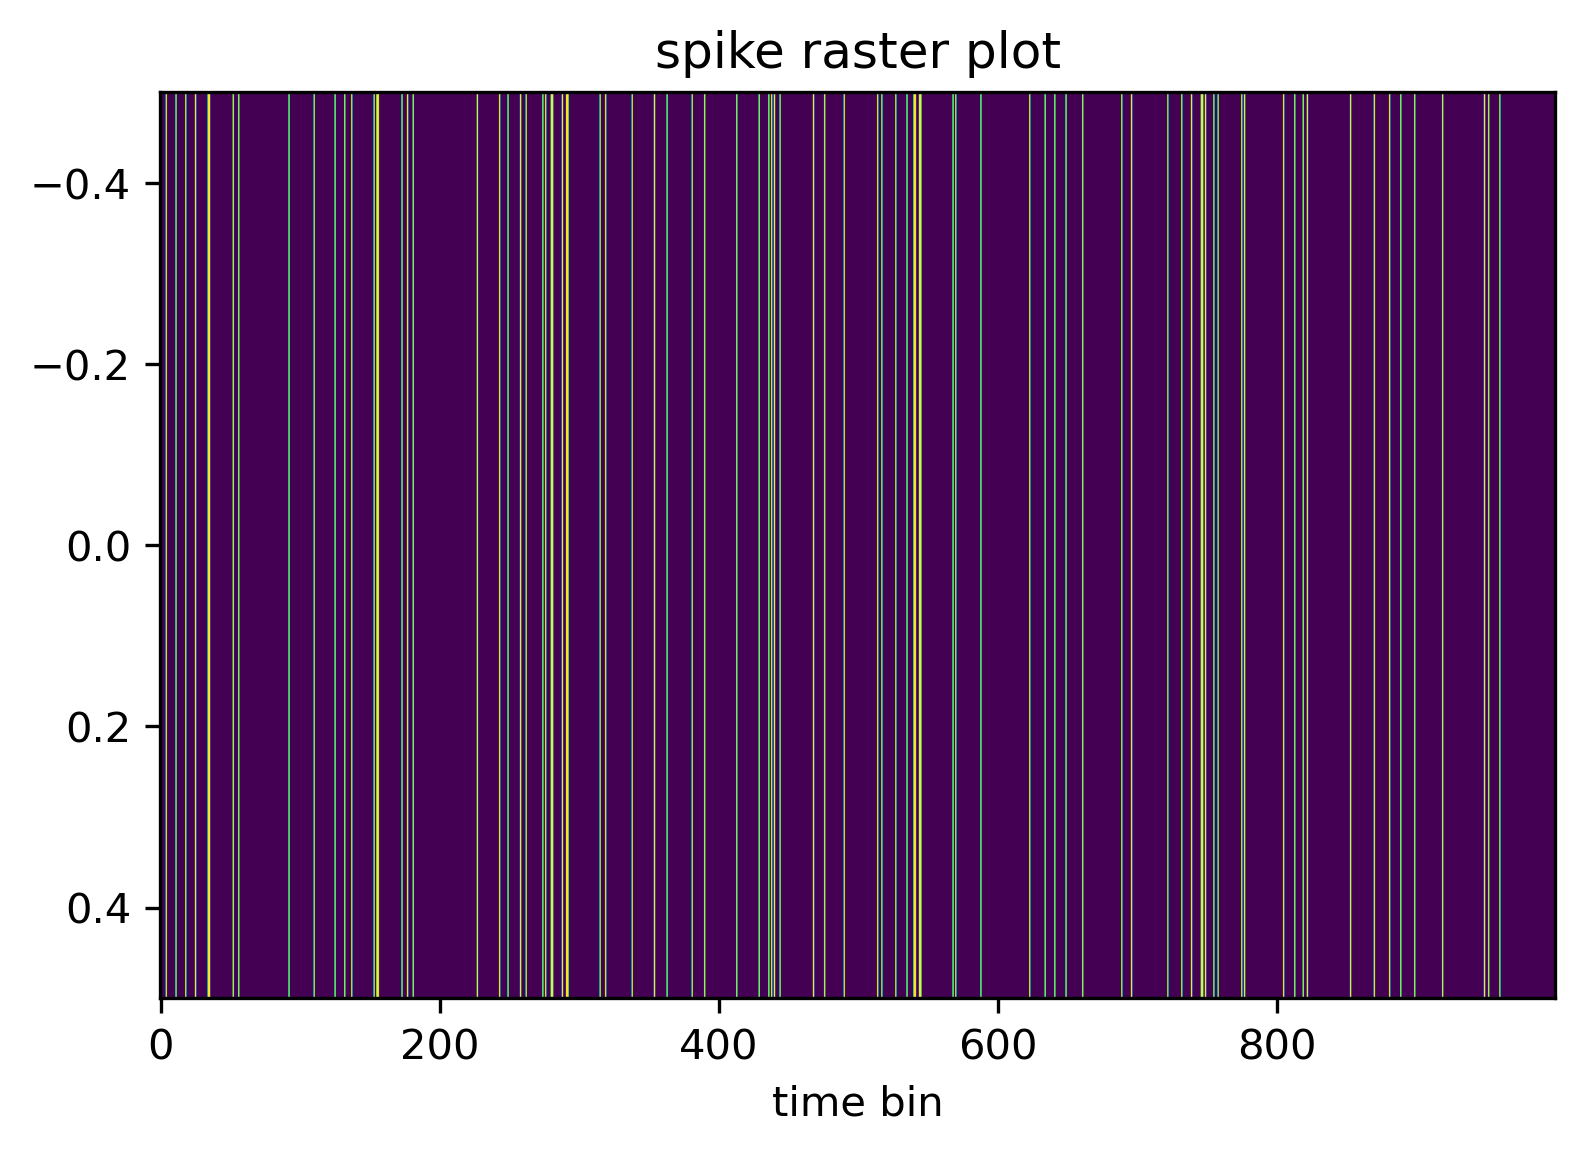

In [13]:
plt.imshow(spiketrain,aspect='auto')
plt.title('spike raster plot')
plt.xlabel('time bin')

### Generate many "trials" of spiketrains



Text(0.5, 0, 'time bin')

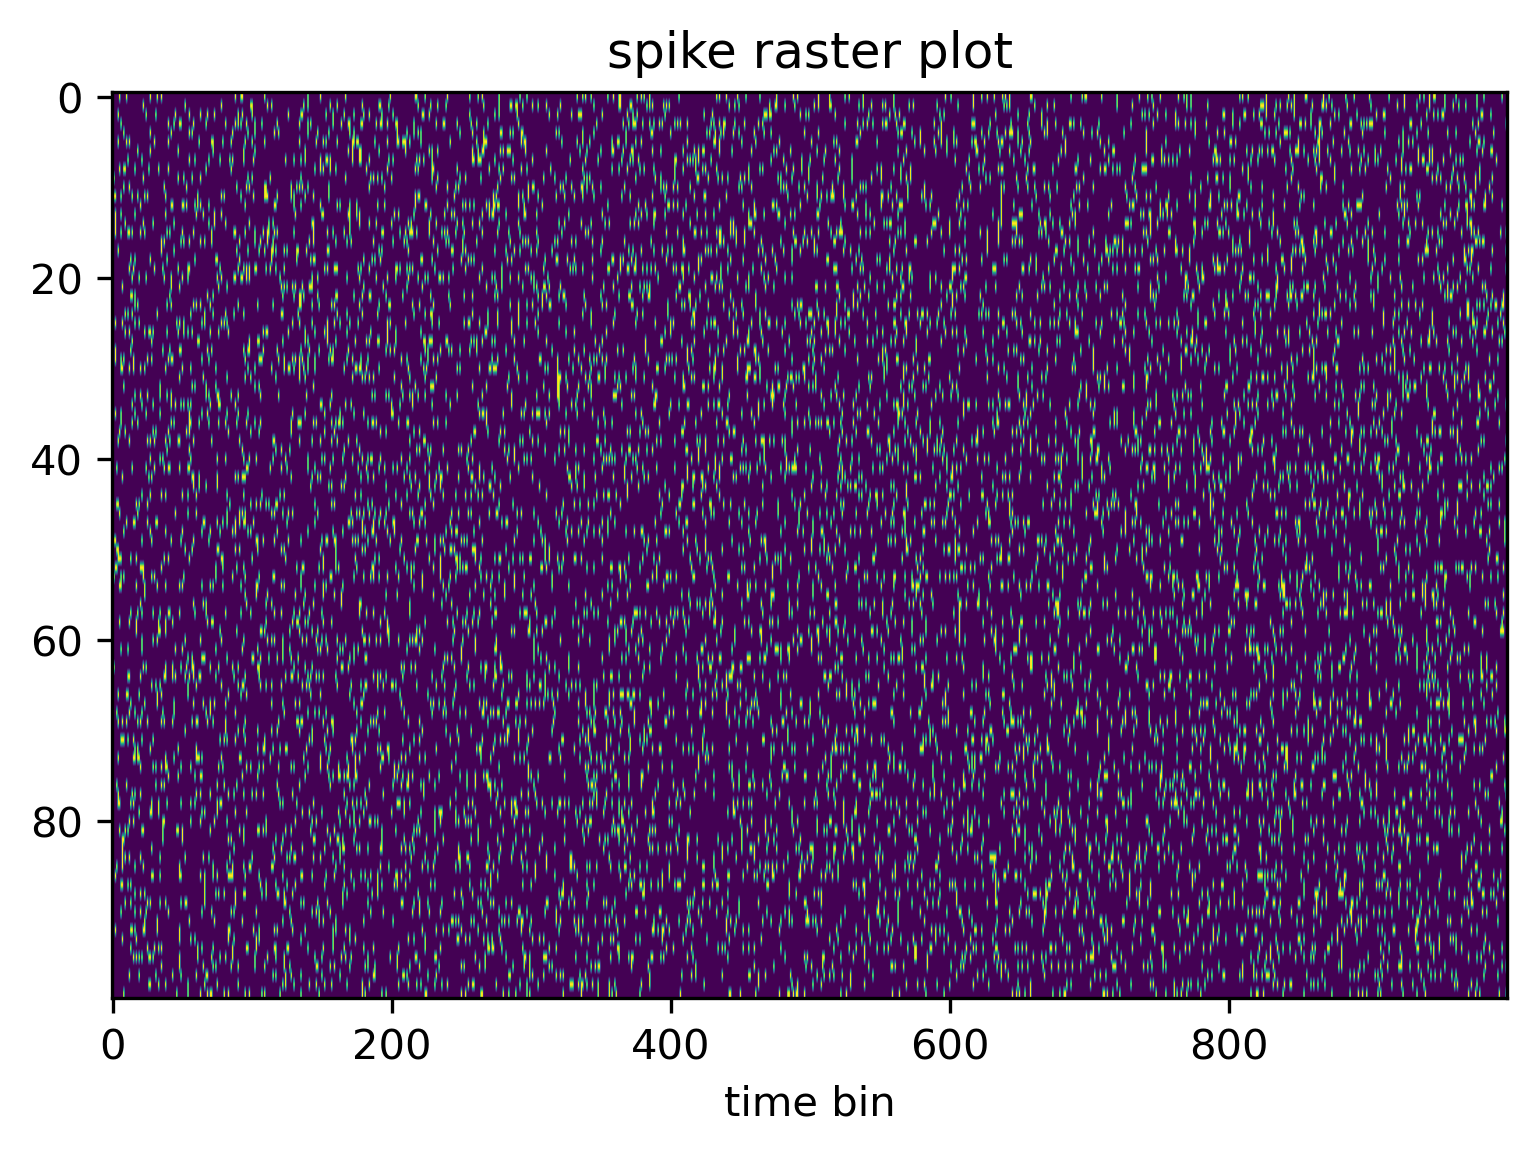

In [14]:
numtrials=100

spiketrain=np.round(rng.uniform(0,1,[numtrials,numbins]) + (p-1/2))


plt.imshow(spiketrain,aspect='auto')
plt.title('spike raster plot')
plt.xlabel('time bin')

### Compute the average spike rate, and standard deviation

In [15]:
rate_per_trial=1/T * np.sum(spiketrain,1)

mean_rate_per_trial = np.mean(rate_per_trial)
print('mean_rate_per_trial=',mean_rate_per_trial)

std_dev_rate_per_trial = np.std(rate_per_trial)
print('std_dev_rate_per_trial=',std_dev_rate_per_trial)


mean_rate_per_trial= 99.16
std_dev_rate_per_trial= 9.272238133266423


### Mini-exercise:
* Rerun the code above.  How consistent are your estimates of the mean and standard deviation of the rate?  Try increasing and decreasing the number of trials to find numbers of trials that are too low (inconsistent estimates) and that seem high enough (consistent estimates).
* Increase the spike rate r above.  Does the standard deviation in the rate estimate go up, down, or stay the same?  How about its relative value (std/mean)?